In [28]:
import os

# Set the working directory
os.chdir(r"C:\Users\Vishva\Desktop\FDM Mini-Project\FDM-MINI-PROJECT\Preprocessing")


In [30]:
# Verify the current working directory
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\Vishva\Desktop\FDM Mini-Project\FDM-MINI-PROJECT\Preprocessing


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [36]:
data = pd.read_csv("Rail_Equipment_Accident_Incident_Data.csv")

C:\Users\Vishva\AppData\Local\Temp\ipykernel_124\2440496537.py:1: DtypeWarning: Columns (26,27,46,47,50,59,61,62,63,64,65,66,67,68,69,71,118,119,123) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Rail_Equipment_Accident_Incident_Data.csv")


In [38]:
data.shape

(215849, 147)

In [40]:
# Calculate the threshold for 10% missing data
threshold = len(data) * 0.10

# Iterate through the columns and drop those with more than 10% missing data
for var in data.columns:
    missing_count = data[var].isnull().sum()
    missing_percentage = missing_count / len(data) * 100
    print(f"{var} - Missing: {missing_percentage:.2f}%")
    
    if missing_count > threshold:
        data.drop(columns=[var], inplace=True)
        print(f"Dropped column: {var}")


Reporting Railroad Code - Missing: 0.00%
Reporting Railroad Name - Missing: 0.00%
Report Year - Missing: 0.00%
Accident Number - Missing: 0.00%
PDF Link - Missing: 0.00%
Accident Year - Missing: 0.00%
Accident Month - Missing: 0.00%
Other Railroad Code - Missing: 91.30%
Dropped column: Other Railroad Code
Other Railroad Name - Missing: 91.33%
Dropped column: Other Railroad Name
Other Accident Number - Missing: 91.30%
Dropped column: Other Accident Number
Other Accident Year - Missing: 91.31%
Dropped column: Other Accident Year
Other Accident Month - Missing: 91.31%
Dropped column: Other Accident Month
Maintenance Railroad Code - Missing: 0.00%
Maintenance Railroad Name - Missing: 0.05%
Maintenance Accident Number - Missing: 0.00%
Maintenance Accident Year - Missing: 0.00%
Maintenance Accident Month - Missing: 0.00%
Grade Crossing ID - Missing: 94.84%
Dropped column: Grade Crossing ID
Day - Missing: 0.00%
Date - Missing: 0.00%
Time - Missing: 0.00%
Accident Type Code - Missing: 0.00%
Ac

In [16]:
data.shape

(52351, 95)

In [51]:
for var in data.columns:
    missing_count = data[var].isnull().sum()
    missing_percentage = missing_count / len(data) * 100
    print(f"{var} - Missing: {missing_percentage:.2f}%")
    
    if missing_count > threshold:
        print(f"Dropped column: {var}")

Reporting Railroad Code - Missing: 0.00%
Reporting Railroad Name - Missing: 0.00%
Report Year - Missing: 0.00%
Accident Number - Missing: 0.00%
PDF Link - Missing: 0.00%
Accident Year - Missing: 0.00%
Accident Month - Missing: 0.00%
Maintenance Railroad Code - Missing: 0.00%
Maintenance Railroad Name - Missing: 0.05%
Maintenance Accident Number - Missing: 0.00%
Maintenance Accident Year - Missing: 0.00%
Maintenance Accident Month - Missing: 0.00%
Day - Missing: 0.00%
Date - Missing: 0.00%
Time - Missing: 0.00%
Accident Type Code - Missing: 0.00%
Accident Type - Missing: 0.00%
Hazmat Cars - Missing: 0.00%
Hazmat Cars Damaged - Missing: 0.00%
Hazmat Released Cars - Missing: 0.00%
Persons Evacuated - Missing: 0.00%
Station - Missing: 0.12%
State Code - Missing: 0.00%
State Abbreviation - Missing: 0.00%
State Name - Missing: 0.00%
County Code - Missing: 1.68%
County Name - Missing: 1.68%
District - Missing: 0.00%
Temperature - Missing: 0.00%
Visibility Code - Missing: 0.11%
Visibility - Mi

In [41]:
data.shape

(215849, 91)

In [44]:
df = data

In [46]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [57]:
df.isnull().sum()

Reporting Railroad Code                        1
Reporting Railroad Name                        3
Report Year                                    1
Accident Number                                0
PDF Link                                       5
                                            ... 
Maintenance Railroad Class                  4463
Maintenance Parent Railroad Company Code     100
Maintenance Parent Railroad Company Name     100
Maintenance Railroad Holding Company         100
Class                                          0
Length: 89, dtype: int64

In [48]:
for var in categorical_columns:
    mode_Value = df[var].mode()
    df.fillna({var: mode_Value}, inplace=True)

In [50]:
# Drop all rows that contain any null values
df = df.dropna(axis=0)

In [52]:
df.shape

(160727, 91)

In [54]:
df

,Reporting Railroad Code,Reporting Railroad Name,Report Year,Accident Number,PDF Link,Accident Year,Accident Month,Maintenance Railroad Code,Maintenance Railroad Name,Maintenance Accident Number,...,Report Key,Reporting Railroad Class,Reporting Parent Railroad Company Code,Reporting Parent Railroad Company Name,Reporting Railroad Holding Company,Maintenance Railroad Class,Maintenance Parent Railroad Company Code,Maintenance Parent Railroad Company Name,Maintenance Railroad Holding Company,Class
0,NICD,Northern Indiana Commuter Transportation District,2017.0,N1700013,https://safetydata.fra.dot.gov/Officeofsafety/...,17.0,6.0,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,201707188,...,NICDN1700013201706,Class 3,NICD,Northern Indiana Commuter Transportation District,Not Assigned,Class 3,NIRC,NORTHEAST ILLINOIS REGIONAL COMMUTER RAIL CORP...,Not Assigned,0
3,IC,Illinois Central Railroad Company,2007.0,543854,https://safetydata.fra.dot.gov/Officeofsafety/...,7.0,1.0,CAEZ,Cargill Elevator,INDUSTRY,...,IC543854200701,Class 1,CN,Canadian National - North America,Canadian National - North America,Class 3,CAEZ,Cargill Elevator,Not Assigned,0
4,IC,Illinois Central Railroad Company,2017.0,938223,https://safetydata.fra.dot.gov/Officeofsafety/...,17.0,10.0,IC,Illinois Central Railroad Company,938223,...,IC938223201710,Class 1,CN,Canadian National - North America,Canadian National - North America,Class 1,CN,Canadian National - North America,Canadian National - North America,1
5,NS,Norfolk Southern Railway Company,2017.0,127020,https://safetydata.fra.dot.gov/Officeofsafety/...,17.0,10.0,NS,Norfolk Southern Railway Company,127020,...,NS127020201710,Class 1,NS,Norfolk Southern Railway Company,Norfolk Southern Railway Company,Class 1,NS,Norfolk Southern Railway Company,Norfolk Southern Railway Company,0
9,BNSF,BNSF Railway Company,2017.0,CH0417103,https://safetydata.fra.dot.gov/Officeofsafety/...,17.0,4.0,BNSF,BNSF Railway Company,CH0417103,...,BNSFCH0417103201704,Class 1,BNSF,BNSF Railway Company,BNSF Railway Company,Class 1,BNSF,BNSF Railway Company,BNSF Railway Company,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215844,ALS,Alton & Southern Railway,2017.0,20170621,https://safetydata.fra.dot.gov/Officeofsafety/...,17.0,6.0,ALS,Alton & Southern Railway,20170621,...,ALS20170621201706,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,0
215845,UP,Union Pacific Railroad Company,2016.0,1216PR012,https://safetydata.fra.dot.gov/Officeofsafety/...,16.0,12.0,UP,Union Pacific Railroad Company,1216PR012,...,UP1216PR012201612,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,0
215846,UP,Union Pacific Railroad Company,2016.0,1216PR012,https://safetydata.fra.dot.gov/Officeofsafety/...,16.0,12.0,UP,Union Pacific Railroad Company,1216PR012,...,UP1216PR012201612,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,0
215847,UP,Union Pacific Railroad Company,2017.0,0217SL002,https://safetydata.fra.dot.gov/Officeofsafety/...,17.0,2.0,UP,Union Pacific Railroad Company,0217SL002,...,UP0217SL002201702,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,Class 1,UP,Union Pacific Railroad Company,Union Pacific Railroad Company,0


In [168]:
df = data

In [60]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Get absolute correlation values with the 'Class' column
correlation_with_class = correlation_matrix['Class'].abs()

# Filter out columns with correlation less than 0.1
columns_to_keep = correlation_with_class[correlation_with_class >= 0.1].index

df_filtered = df[columns_to_keep]

# Display the remaining columns and their correlations
print("Remaining columns:", df_filtered.columns)
print(correlation_with_class[columns_to_keep])

Remaining columns: Index(['Accident Type Code', 'Track Type Code', 'Train Speed', 'Maximum Speed',
       'First Car Position', 'Derailed Head End Locomotives', 'Class'],
      dtype='object')
Accident Type Code               0.139331
Track Type Code                  0.145953
Train Speed                      0.257217
Maximum Speed                    0.287453
First Car Position               0.112304
Derailed Head End Locomotives    0.132163
Class                            1.000000
Name: Class, dtype: float64


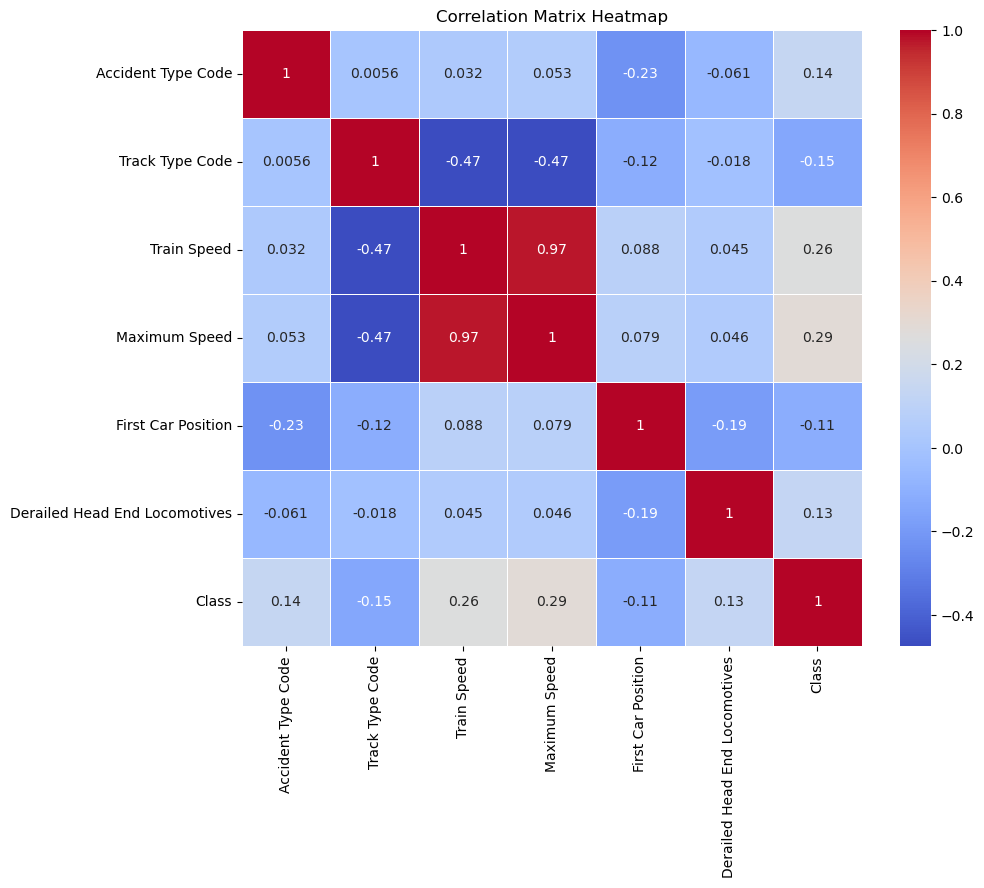

In [62]:
import seaborn as sns

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


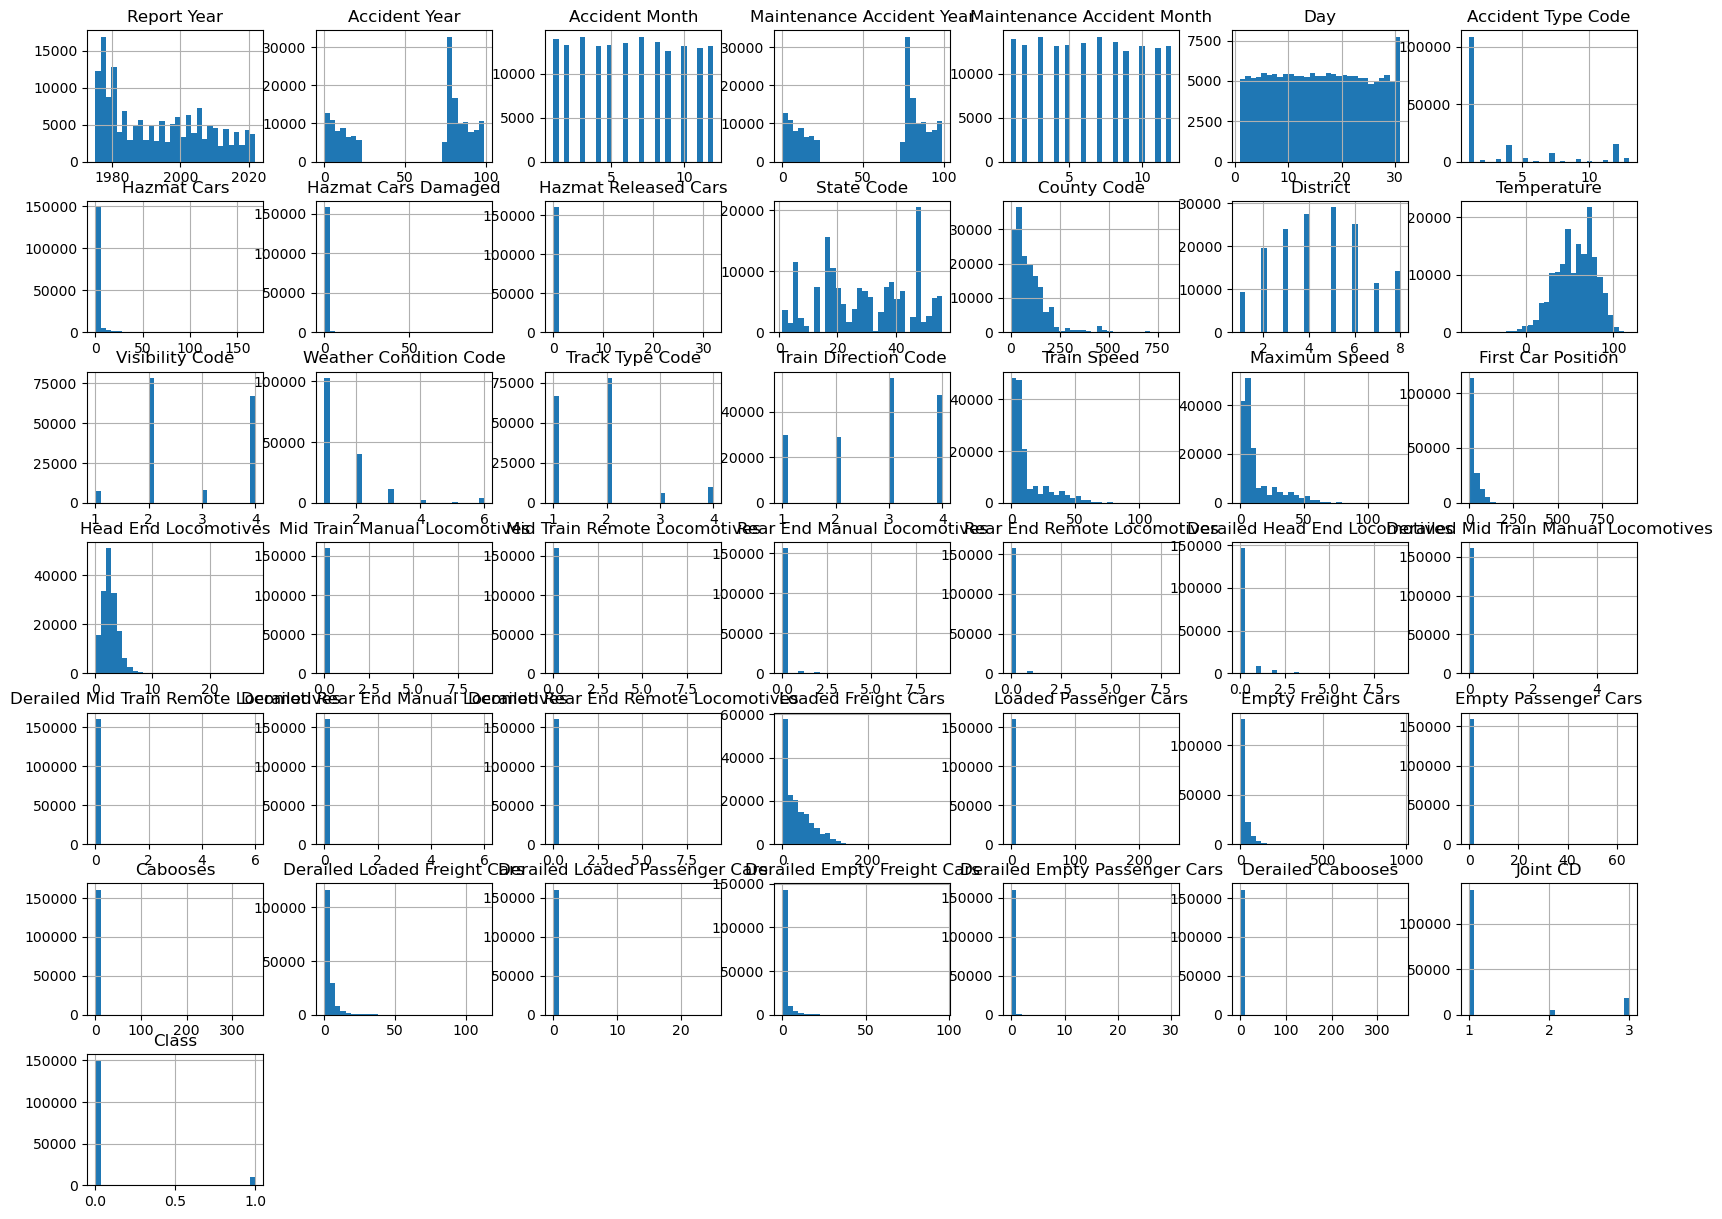

In [64]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

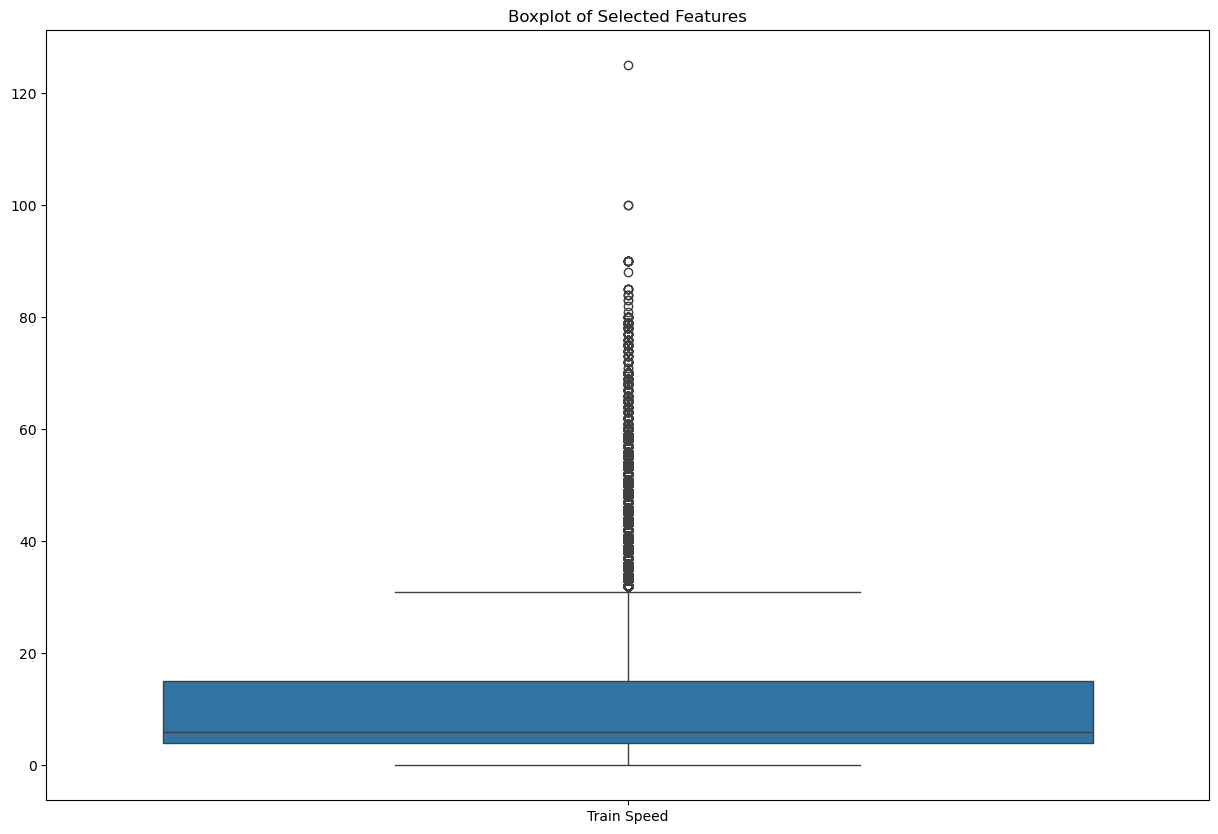

In [66]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['Train Speed', 'Total Damage Cost', 'Gross Tonnage']])
plt.title('Boxplot of Selected Features')
plt.show()

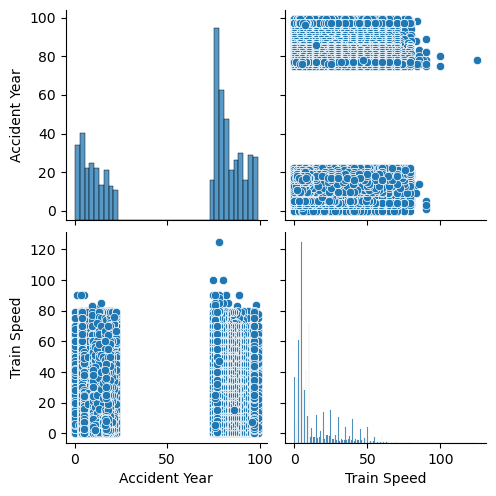

In [68]:
sns.pairplot(df[['Accident Year', 'Train Speed', 'Total Damage Cost', 'Gross Tonnage']])
plt.show()


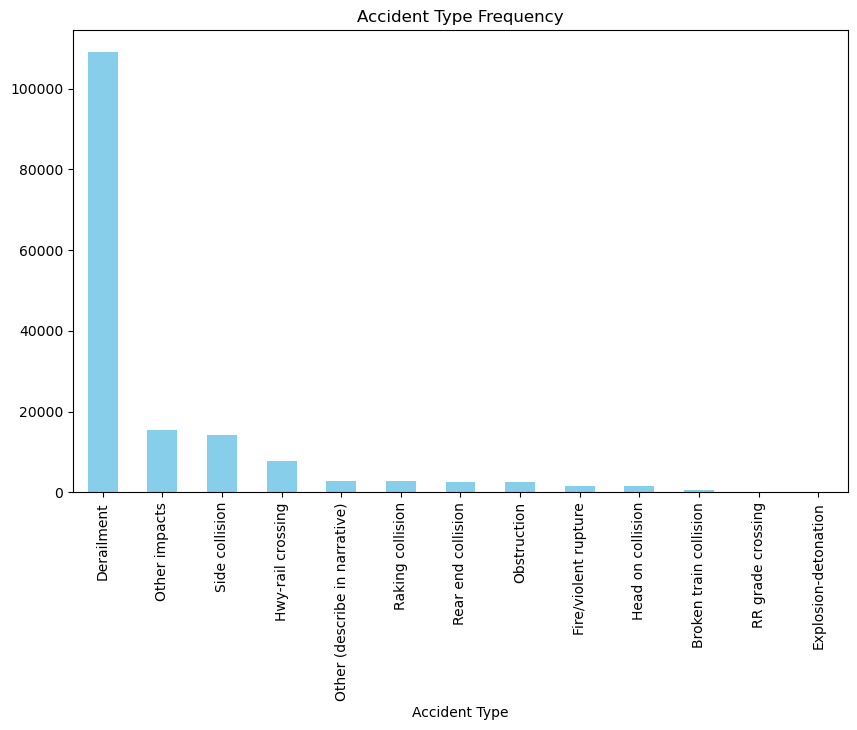

In [70]:
df['Accident Type'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Accident Type Frequency')
plt.show()


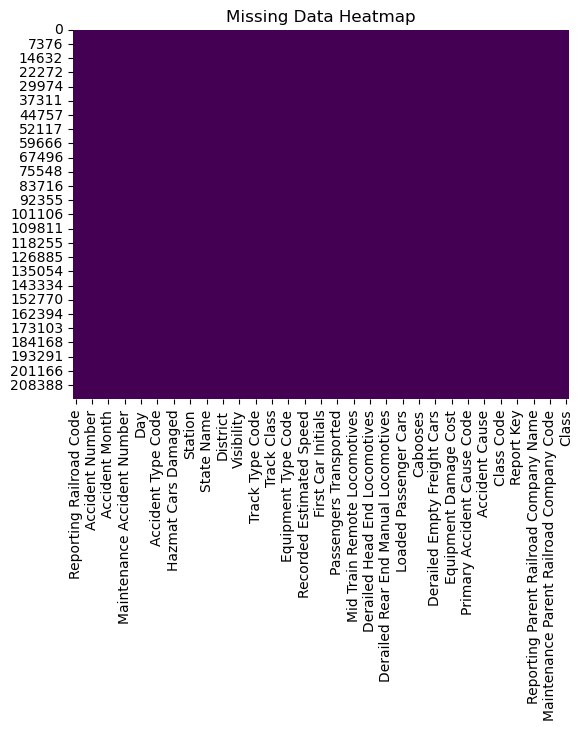

In [74]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


C:\Users\Vishva\AppData\Local\Temp\ipykernel_124\1278959967.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Accident Type', data=df, palette='Set1')


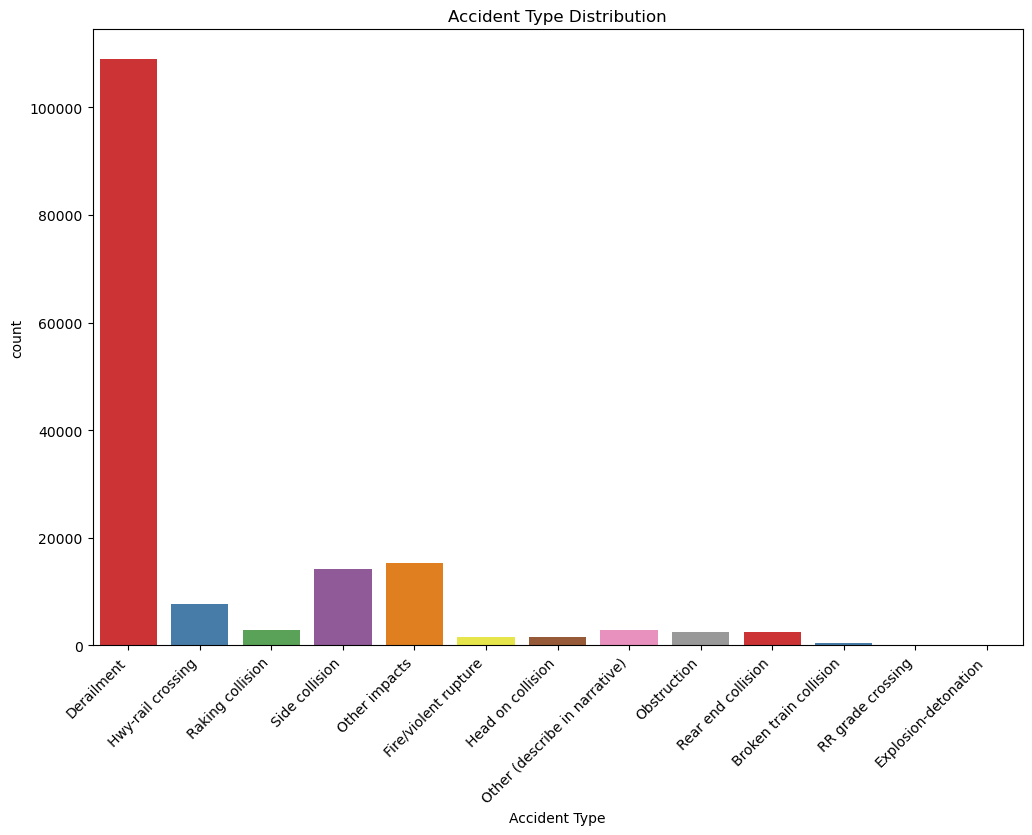

In [82]:
plt.figure(figsize=(12, 8))  # Increase the size of the figure
sns.countplot(x='Accident Type', data=df, palette='Set1')
plt.title('Accident Type Distribution')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if they are too crowded
plt.show()

In [74]:
df.shape

(160729, 89)

In [76]:
from scipy.stats import chi2_contingency

In [78]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [80]:
categorical_columns

Index(['Reporting Railroad Code', 'Reporting Railroad Name', 'Accident Number',
       'PDF Link', 'Maintenance Railroad Code', 'Maintenance Railroad Name',
       'Maintenance Accident Number', 'Date', 'Time', 'Accident Type',
       'Persons Evacuated', 'Station', 'State Abbreviation', 'State Name',
       'County Name', 'Visibility', 'Weather Condition', 'Track Type',
       'Track Name', 'Track Class', 'Train Direction', 'Equipment Type Code',
       'Equipment Type', 'Recorded Estimated Speed', 'Gross Tonnage',
       'First Car Initials', 'First Car Number', 'Passengers Transported',
       'Maximum Speed', 'Track Damage Cost', 'Train Speed',
       'Primary Accident Cause Code', 'Primary Accident Cause',
       'Accident Cause Code', 'Accident Cause', 'Joint Track Type',
       'Joint Track Class', 'Class Code', 'Incident Key', 'Report Key',
       'Reporting Railroad Class', 'Reporting Parent Railroad Company Code',
       'Reporting Parent Railroad Company Name',
       'Repor

In [82]:
for var in categorical_columns:
    cross_tab = pd.crosstab(index=df[var], columns=df["Class"])
    chi_sq_result = chi2_contingency(cross_tab,)
    p, x = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept" 
    print(f"The p-value for {var} is {chi_sq_result[1]} and hence we {x} the null Hpothesis with {chi_sq_result[2]} degrees of freedom")


The p-value for Reporting Railroad Code is 0.0 and hence we reject the null Hpothesis with 872 degrees of freedom
The p-value for Reporting Railroad Name is 0.0 and hence we reject the null Hpothesis with 869 degrees of freedom
The p-value for Accident Number is 1.5378703849988415e-183 and hence we reject the null Hpothesis with 129160 degrees of freedom
The p-value for PDF Link is 1.868785249418285e-139 and hence we reject the null Hpothesis with 146704 degrees of freedom
The p-value for Maintenance Railroad Code is 8.043628796850402e-78 and hence we reject the null Hpothesis with 2696 degrees of freedom
The p-value for Maintenance Railroad Name is 9.975373073796458e-79 and hence we reject the null Hpothesis with 2684 degrees of freedom
The p-value for Maintenance Accident Number is 7.974401616625178e-271 and hence we reject the null Hpothesis with 124608 degrees of freedom
The p-value for Date is 2.6104019686879308e-139 and hence we reject the null Hpothesis with 17427 degrees of fre

In [84]:
df.shape

(160729, 89)

In [86]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(var1, var2):
    cross_tab = pd.crosstab(var1, var2)
    chi2 = chi2_contingency(cross_tab)[0]
    n = cross_tab.sum().sum()
    r, k = cross_tab.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Calculate Cramér's V for each categorical column with 'Class'
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
cramer_v_values = {}

for var in categorical_columns:
    cramer_v = cramers_v(df[var], df['Class'])
    cramer_v_values[var] = cramer_v

# Convert to a DataFrame for better visualization
cramer_v_df = pd.DataFrame(list(cramer_v_values.items()), columns=['Column', 'CramerV'])

# Filter strong correlations (e.g., > 0.3)
strong_categorical_correlations = cramer_v_df[cramer_v_df['CramerV'] > 0.2]

# Display strongly correlated categorical columns
print("Strongly correlated categorical columns:", strong_categorical_correlations)

Strongly correlated categorical columns:                          Column   CramerV
2               Accident Number  0.947816
3                      PDF Link  1.000000
6   Maintenance Accident Number  0.943181
7                          Date  0.374488
9                 Accident Type  0.507785
11                      Station  0.487314
18                   Track Name  0.460256
19                  Track Class  0.234892
24                Gross Tonnage  0.323462
25           First Car Initials  0.284976
26             First Car Number  0.690930
28                Maximum Speed  0.585764
29            Track Damage Cost  0.401003
30                  Train Speed  0.688207
31  Primary Accident Cause Code  0.498804
32       Primary Accident Cause  0.498800
33          Accident Cause Code  0.498909
34               Accident Cause  0.498905
36            Joint Track Class  0.236289
38                 Incident Key  1.000000
39                   Report Key  1.000000


In [88]:
df.shape

(160729, 89)

In [90]:
print(strong_categorical_correlations)

                         Column   CramerV
2               Accident Number  0.947816
3                      PDF Link  1.000000
6   Maintenance Accident Number  0.943181
7                          Date  0.374488
9                 Accident Type  0.507785
11                      Station  0.487314
18                   Track Name  0.460256
19                  Track Class  0.234892
24                Gross Tonnage  0.323462
25           First Car Initials  0.284976
26             First Car Number  0.690930
28                Maximum Speed  0.585764
29            Track Damage Cost  0.401003
30                  Train Speed  0.688207
31  Primary Accident Cause Code  0.498804
32       Primary Accident Cause  0.498800
33          Accident Cause Code  0.498909
34               Accident Cause  0.498905
36            Joint Track Class  0.236289
38                 Incident Key  1.000000
39                   Report Key  1.000000


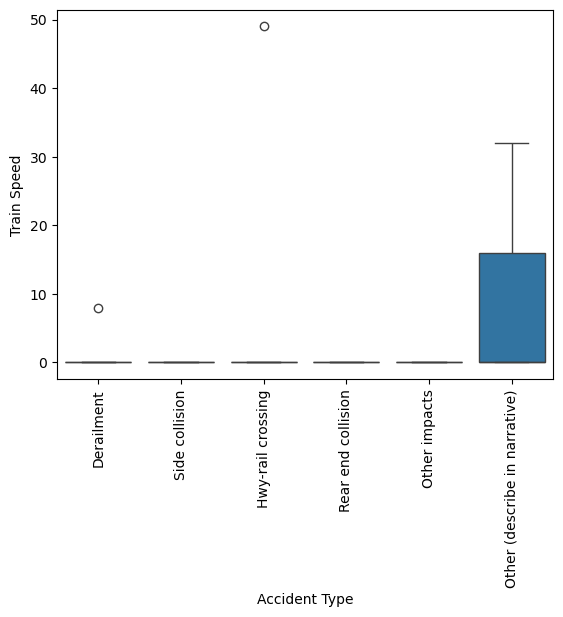

In [13]:
import seaborn as sns

sns.boxplot(data=data[data["Train Speed"] < 60], x='Accident Type', y='Train Speed')
plt.xticks(rotation=90);

In [92]:
df.shape

(160729, 89)

In [94]:
df.columns

Index(['Reporting Railroad Code', 'Reporting Railroad Name', 'Report Year',
       'Accident Number', 'PDF Link', 'Accident Year', 'Accident Month',
       'Maintenance Railroad Code', 'Maintenance Railroad Name',
       'Maintenance Accident Number', 'Maintenance Accident Year',
       'Maintenance Accident Month', 'Day', 'Date', 'Time',
       'Accident Type Code', 'Accident Type', 'Hazmat Cars',
       'Hazmat Cars Damaged', 'Hazmat Released Cars', 'Persons Evacuated',
       'Station', 'State Code', 'State Abbreviation', 'State Name',
       'County Code', 'County Name', 'District', 'Temperature',
       'Visibility Code', 'Visibility', 'Weather Condition Code',
       'Weather Condition', 'Track Type Code', 'Track Type', 'Track Name',
       'Track Class', 'Train Direction Code', 'Train Direction',
       'Equipment Type Code', 'Equipment Type', 'Recorded Estimated Speed',
       'Gross Tonnage', 'First Car Initials', 'First Car Number',
       'First Car Position', 'Passengers Tr

In [96]:
# Extract the names of the strongly correlated categorical columns
strong_columns = strong_categorical_correlations['Column']

# Combine the strong categorical columns and the numeric columns to keep
columns_to_include = list(strong_columns) + list(columns_to_keep)

# Create a new dataset with the selected columns
df = df[columns_to_include]

# Display the new dataset
print("New dataset with selected columns:")
print(df.head())


New dataset with selected columns:
  Accident Number                                           PDF Link  \
0        N1700013  https://safetydata.fra.dot.gov/Officeofsafety/...   
3          543854  https://safetydata.fra.dot.gov/Officeofsafety/...   
4          938223  https://safetydata.fra.dot.gov/Officeofsafety/...   
5          127020  https://safetydata.fra.dot.gov/Officeofsafety/...   
9       CH0417103  https://safetydata.fra.dot.gov/Officeofsafety/...   

  Maintenance Accident Number        Date      Accident Type      Station  \
0                   201707188    6/6/2017         Derailment      CHICAGO   
3                    INDUSTRY   1/11/2007         Derailment      RESERVE   
4                      938223   10/7/2017  Hwy-rail crossing     KANKAKEE   
5                      127020  10/15/2017         Derailment  BOURBONNAIS   
9                   CH0417103    4/6/2017         Derailment       CICERO   

             Track Name Track Class Gross Tonnage First Car Initials 

In [77]:
df.shape

(160727, 28)

In [98]:
df.to_csv('preprocessedDataset.csv', index=False) 

In [100]:
df = pd.read_csv('preprocessedDataset.csv')

In [102]:
df.shape

(160729, 9)

In [104]:
df.head()

,Station,Track Name,Track Class,Gross Tonnage,Maximum Speed,Train Speed,Joint Track Class,Track Type Code,Class
0,CHICAGO,YARD LEAD,1,0,98627,132013,1,2,0
1,RESERVE,#4 SWITCH AT CARGILL,1,"14,100",5220,9986,1,4,0
2,KANKAKEE,HERSCHER SPUR,1,"3,482",13000,13231,1,3,1
3,BOURBONNAIS,KA03,1,"6,706",7418,148289,1,2,0
4,CICERO,1108,1,"15,760",750,12146,1,2,0


In [106]:
print(df.columns)


Index(['Station', 'Track Name', 'Track Class', 'Gross Tonnage',
       'Maximum Speed', 'Train Speed', 'Joint Track Class', 'Track Type Code',
       'Class'],
      dtype='object')


In [78]:
pip install category_encoders


   ---------------------------------------- 0.0/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   ----- ---------------------------------- 10.2/81.9 kB ? eta -:--:--
   --------------- ------------------------ 30.7/81.9 kB 262.6 kB/s eta 0:00:01
   --------------- ------------------------ 30.7/81.9 kB 262.6 kB/s eta 0:00:01
   -------------------- ------------------- 41.0/81.9 kB 164.3 kB/s eta 0:00:01
   ----------------------------------- ---- 71.7/81.9 kB 262.6 kB/s eta 0:00:01
   ---------------------------------------- 81.9/81.9 kB 286.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [108]:
import category_encoders as ce

# Create the target encoder
target_encoder = ce.TargetEncoder(cols=['Station'])

# Fit and transform the 'Station' column based on the target column 'Class'
df['Station_encoded'] = target_encoder.fit_transform(df['Station'], df['Class'])
df =df.drop(columns="Station")


In [110]:
df.head(2)

,Track Name,Track Class,Gross Tonnage,Maximum Speed,Train Speed,Joint Track Class,Track Type Code,Class,Station_encoded
0,YARD LEAD,1,0,98627,132013,1,2,0,0.053073
1,#4 SWITCH AT CARGILL,1,"14,100",5220,9986,1,4,0,0.017912


In [112]:
# Create the target encoder
target_encoder = ce.TargetEncoder(cols=['Track Name'])

# Fit and transform the 'Station' column based on the target column 'Class'
df['Track_Name_encoded'] = target_encoder.fit_transform(df['Track Name'], df['Class'])
df =df.drop(columns="Track Name")


In [114]:
df.head(2)

,Track Class,Gross Tonnage,Maximum Speed,Train Speed,Joint Track Class,Track Type Code,Class,Station_encoded,Track_Name_encoded
0,1,0,98627,132013,1,2,0,0.053073,0.047923
1,1,"14,100",5220,9986,1,4,0,0.017912,0.056952


In [116]:
df.shape

(160729, 9)

In [120]:
df.to_csv('preprocessedDataset.csv', index=False) 

In [152]:
df = pd.read_csv('preprocessedDataset.csv')

In [142]:
df.head()

,Track Class,Gross Tonnage,Maximum Speed,Train Speed,Joint Track Class,Track Type Code,Class,Station_encoded,Track_Name_encoded
0,1,0,98627,132013,1,2,0,0.053073,0.047923
1,1,14100,5220,9986,1,4,0,0.017912,0.056952
2,1,3482,13000,13231,1,3,1,0.099379,0.187061
3,1,6706,7418,148289,1,2,0,0.053527,0.056183
4,1,15760,750,12146,1,2,0,0.060976,0.055358


In [165]:
#normalizing

In [154]:
Y = df['Class']
X = df.drop(columns='Class', axis=1)

In [146]:
Y

0         0
1         0
2         1
3         0
4         0
         ..
160724    0
160725    0
160726    0
160727    0
160728    0
Name: Class, Length: 160729, dtype: int64

In [148]:
scaler = StandardScaler()

In [156]:
scaler.fit(X)

StandardScaler()

In [158]:
standarized_data = scaler.transform(X)

In [162]:
X = standarized_data
Y = df['Class']

In [374]:
type(X)

numpy.ndarray

In [241]:
type(Y)

pandas.core.series.Series

In [164]:
X_df = pd.DataFrame(X)
combined_df = pd.concat([X_df, Y.rename('Target')], axis=1)
combined_df.to_csv("preprocessedDataset_standarized.csv", index=False)
